# Project: United States Firearm Ownership Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This analysis will utilize data from the FBI's NICS (National Instant Criminal Background Check System) and the US Census data from 2010. The timeframe for gun purchases we will explore is from 2011 through 2016. 
>- We will explore the quantity/type of gun purchases by year to look for any trends. 
>- We will also see if there is any association between median household income and firearm purchases for 2016. Finally, we will examine State per capita gun purchases based on the estimated State populations for 2016.

In [84]:
# Import required packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import my custom function from functions.py
from functions import RemoveChars

<a id='wrangling'></a>
## Data Wrangling

>We will begin by loading our datasets from their respective csv files and then proceed to identify the data they contain so that we can cleanse the data to give us a good set of facts to perform analysis upon.

### General Properties

In [85]:
# Load both csv files into Pandas Dataframes
df_guns = pd.read_csv('gun_data.csv', index_col=False)
df_census = pd.read_csv('USCensusData.csv', index_col=False)

# Display the first 5 rows
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [86]:
# Get the Shape of the df_guns dataframe so we know how many rows/columns there are
df_guns.shape

(12485, 27)

>Based on the above information, we have 12,485 rows of data with 27 columns. Next, we will check the *df_guns* dataset to identify which columns need to be removed, and where values are missing. Modifications will be made in the <a href="#cleaning">Data Cleaning</a> section below.

In [87]:
# Get summary information about the data contained in df_guns
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

>Based upon my review of the data columns, I will be removing the many columns in the Data Cleaning section below.
>
>Check the *df_census* dataset to identify columns and null values that may need to be removed.

In [88]:
# Display the first 5 rows
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


>Upon review of the above data in *df_census*, the dataset will need to be transposed so that the Census categories (features) become the columns, and the States become the rows. There apears to be missing values that require further investigation after the transpose has been performed.

In [89]:
# Info shows current state of the data after import. Additional inspection required after transpose.
df_census.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

>Upon manual inspection of the census data file, there were additional rows at the bottom that contained *informational notes* describing the data. Those rows were manually deleted from the file, but can be referenced in the following file: <a href="https://github.com/GaryLBentley/investigate_dataset/blob/main/CensusDataNotes.txt">CensusDataNotes</a>

<a id='cleaning'></a>
### Data Cleaning
>Cleaning of the datasets is performed to ensure that they are void of any missing, or null values. If there are null values present, those fields need to be populated with the best value possible. If there are rows that are not needed, those shall be removed. A check for duplicates is also needed to ensure that no rows of data contain the exact same data that would skew our analysis.

### Cleaning of the *df_guns* dataset:

In [90]:
# Check for any duplicated rows
df_guns.duplicated().sum()

0

>There are no duplicated records. Next, lets remove the unwanted columns:

In [91]:
# Remove unwanted columns from the dataset
remove = ['permit','permit_recheck','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun',
          'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun',
          'rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun',
          'return_to_seller_long_gun','return_to_seller_other']

df_guns.drop(remove, axis=1, inplace=True)
df_guns.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,4347.0,6063.0,165.0,366,17747
4,2017-09,California,37165.0,24581.0,2984.0,0,123506


>Review for missing values.

In [92]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   other     5500 non-null   float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


>Columns *handgun*, *long_gun* and *other* are missing values. Fill all Nan (null) values with zeros since that would be equivilant to a null value.

In [93]:
# Fill NaN values in the dataframe with 0 (zero)
df_guns = df_guns.fillna(0)

# View info to confirm that all records now contain non-null values
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12485 non-null  float64
 3   long_gun  12485 non-null  float64
 4   other     12485 non-null  float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


>Next step for the *df_guns* is to rollup individual months into years so we have annual gun purchases by State. The Month part of the date from the *month* column needs to be removed, leaving only the year portion. Rename the column to *year* and then convert to a numeric value. Sum the data as the final step.

In [94]:
# Overwrite the 'month' column with just the year portion of the date
df_guns['month'] = df_guns['month'].str[:4]

# Rename 'month' to 'year'
df_guns.rename(columns={'month':'year'}, inplace=True)

# Convert year to int
df_guns['year'] = pd.to_numeric(df_guns['year'])

# Create df for Total guns by year/state
df_total_guns_by_state = df_guns.groupby(['year','state'], as_index=False).sum()

# Create df for Total guns by year
df_total_guns = df_guns.groupby(['year'], as_index=False).sum()

# View the first 5 rows to confirm modifications were successful
df_total_guns.head()

,year,handgun,long_gun,other,multiple,totals
0,1998,219999.0,582791.0,0.0,8720,891898
1,1999,2536738.0,5217451.0,0.0,103743,9043747
2,2000,2191879.0,4779978.0,0.0,95777,8427096
3,2001,2167213.0,4943375.0,0.0,97132,8820045
4,2002,1845112.0,4409311.0,0.0,93069,8367069


>Create the *df_annual_gun_purchases* that wil be used for analysis and visualization. For visualization purposes, we divide the dataframe by 1 million.

In [95]:
# Create df_annual_gun_purchases that contains records from 2011 to 2016
df_annual_gun_purchases = df_total_guns.query('year >= 2011 & year <= 2016')

# Temporarily set the year column to the "index" so it is not part of the div() calculations
df_annual_gun_purchases.set_index('year', inplace=True)

# Use the div() function to divide all data cells in the dataframe by 1 million
df_annual_gun_purchases =  df_annual_gun_purchases.div(1000000)

# Reset the index on the dataframe
df_annual_gun_purchases.reset_index(inplace=True)

# View the first 5 rows to confirm modifications were successful
df_annual_gun_purchases.head()

,year,handgun,long_gun,other,multiple,totals
0,2011,4.301389,5.445966,0.070137,0.219618,16.336732
1,2012,5.682963,6.866225,0.162823,0.230270,19.463832
2,2013,6.387502,7.128798,0.212776,0.241360,20.966704
3,2014,6.199243,5.543371,0.268263,0.225475,20.860241
4,2015,7.333808,5.479441,0.329499,0.242375,23.026288


### Cleaning of the *df_census* dataset:

In [96]:
#Check for any duplicated rows
df_census.duplicated().sum()

0

>There are no duplicated records. Next, display a portion of the data:

In [97]:
# Census dataframe in it's original form for review
df_census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


>### Data in the *df_census* requires several modifications to make it usable for analysis:
>- Rename the *Fact* column to *index*. This is temporary to ensure the real index column is not transposed.
>- Transpose the columns (Rows become columns and columns become rows)
>- Rename the desired colums that we will want to keep for the dataset
>- Use the reset_index function to add a new index column to the dataframe
>- Rename the original *index* column to *state*
>- Drop the first row of data that used to be the *Fact Note* column
>- Create final dataframe for analysis with desired columns

In [98]:
# Rename the 'Fact' column to 'index'
df_census.rename(columns={'Fact':'index'}, inplace=True)

# Transpose the dataframe using the 'index' column
df_census = df_census.set_index('index').transpose()

# Rename desired columns
df_census.rename(columns = {df_census.columns[0]:'est_pop_2016', 'Population, Census, April 1, 2010':'pop_2010', 'Median household income (in 2015 dollars), 2011-2015':'median_income'}, inplace=True)

# Reset the index on the dataframe which adds a new index column
df_census.reset_index(inplace=True)

# Rename the old 'index' columm to 'state' which is the data values it holds
df_census.rename(columns={'index':'state'}, inplace=True)

# Drop the first row of data that was the original 'Fact Note' column containing NaN values
df_census.drop([0], inplace=True)

# Assign desired columns to df_census
df_census = df_census[['state', 'est_pop_2016', 'pop_2010', 'median_income']]

# View the first 5 rows to confirm modifications were successful
df_census.head()

index,state,est_pop_2016,pop_2010,median_income
1,Alabama,"4,863,300","4,779,736","$43,623"
2,Alaska,"741,894","710,231","$72,515"
3,Arizona,"6,931,071","6,392,017","$50,255"
4,Arkansas,"2,988,248","2,915,918","$41,371"
5,California,"39,250,017","37,253,956","$61,818"


>Verify that we have the desired columns in our updated dataset (above) and ensure we have all 50 States (below).

In [99]:
# Validate there there is data for 50 States
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          50 non-null     object
 1   est_pop_2016   50 non-null     object
 2   pop_2010       50 non-null     object
 3   median_income  50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


>Clean the data to remove special characters and convert to numeric values for *est_pop_2016*, *pop_2010* and *median_income* columns.

In [101]:
# Remove '$' and ',' from data fields
df_census= RemoveChars(df_census,'est_pop_2016','[$,]','')
df_census= RemoveChars(df_census,'pop_2010','[$,]','')
df_census= RemoveChars(df_census,'median_income','[$,]','')

# Convert both population and income columns to numeric values
df_census['est_pop_2016'] = pd.to_numeric(df_census['est_pop_2016'])
df_census['pop_2010'] = pd.to_numeric(df_census['pop_2010'])
df_census['median_income'] = pd.to_numeric(df_census['median_income'])

# Validate that columns now contain numeric values
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          50 non-null     object
 1   est_pop_2016   50 non-null     int64 
 2   pop_2010       50 non-null     int64 
 3   median_income  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


>All States now have numeric values for analysis.

In [102]:
# View the first 5 rows
df_census.head()

index,state,est_pop_2016,pop_2010,median_income
1,Alabama,4863300,4779736,43623
2,Alaska,741894,710231,72515
3,Arizona,6931071,6392017,50255
4,Arkansas,2988248,2915918,41371
5,California,39250017,37253956,61818


>Prepare the *df_guns_med_income* dataset using just 2016 data.

In [103]:
# Create initial dataset from df_total_guns_by_state for 2016
df_guns_2016 = df_total_guns_by_state.query('year == 2016')

# Usa a Pandas.merge to Join df_guns_2016 to df_census based on an inner join on the "state" column
df_guns_med_income = pd.merge(df_guns_2016, df_census, on='state')

# Create guns_per_med_income calculated column
df_guns_med_income['guns_per_med_income'] = df_guns_med_income['totals'] / df_guns_med_income['median_income']

# Create guns_per_capita calculated column
df_guns_med_income['guns_per_capita'] = df_guns_med_income['totals'] / df_guns_med_income['est_pop_2016']

# View the first 5 rows to confirm modifications were successful
df_guns_med_income.head()

,year,state,handgun,long_gun,other,multiple,totals,est_pop_2016,pop_2010,median_income,guns_per_med_income,guns_per_capita
0,2016,Alabama,153123.0,121963.0,6104.0,6545,616947,4863300,4779736,43623,14.142700,0.126858
1,2016,Alaska,37491.0,36887.0,2889.0,2316,87647,741894,710231,72515,1.208674,0.118140
2,2016,Arizona,166784.0,108988.0,13122.0,7908,416279,6931071,6392017,50255,8.283335,0.060060
3,2016,Arkansas,80244.0,82120.0,3059.0,4400,266014,2988248,2915918,41371,6.429963,0.089020
4,2016,California,560355.0,554550.0,211707.0,0,2377167,39250017,37253956,61818,38.454285,0.060565


<a id='eda'></a>
## Exploratory Data Analysis


>### Are there any trends associated with firearm purchases between 2011 and 2016?
>- Visualize annual handgun purchases
>- Visualize annual long gun purchases
>- Vusialize annual total gun purchases
>
>Determine if there are any trends visable in each of the above categories. Utilize a series of barcharts for analysis.

### Generate the vizualizations:

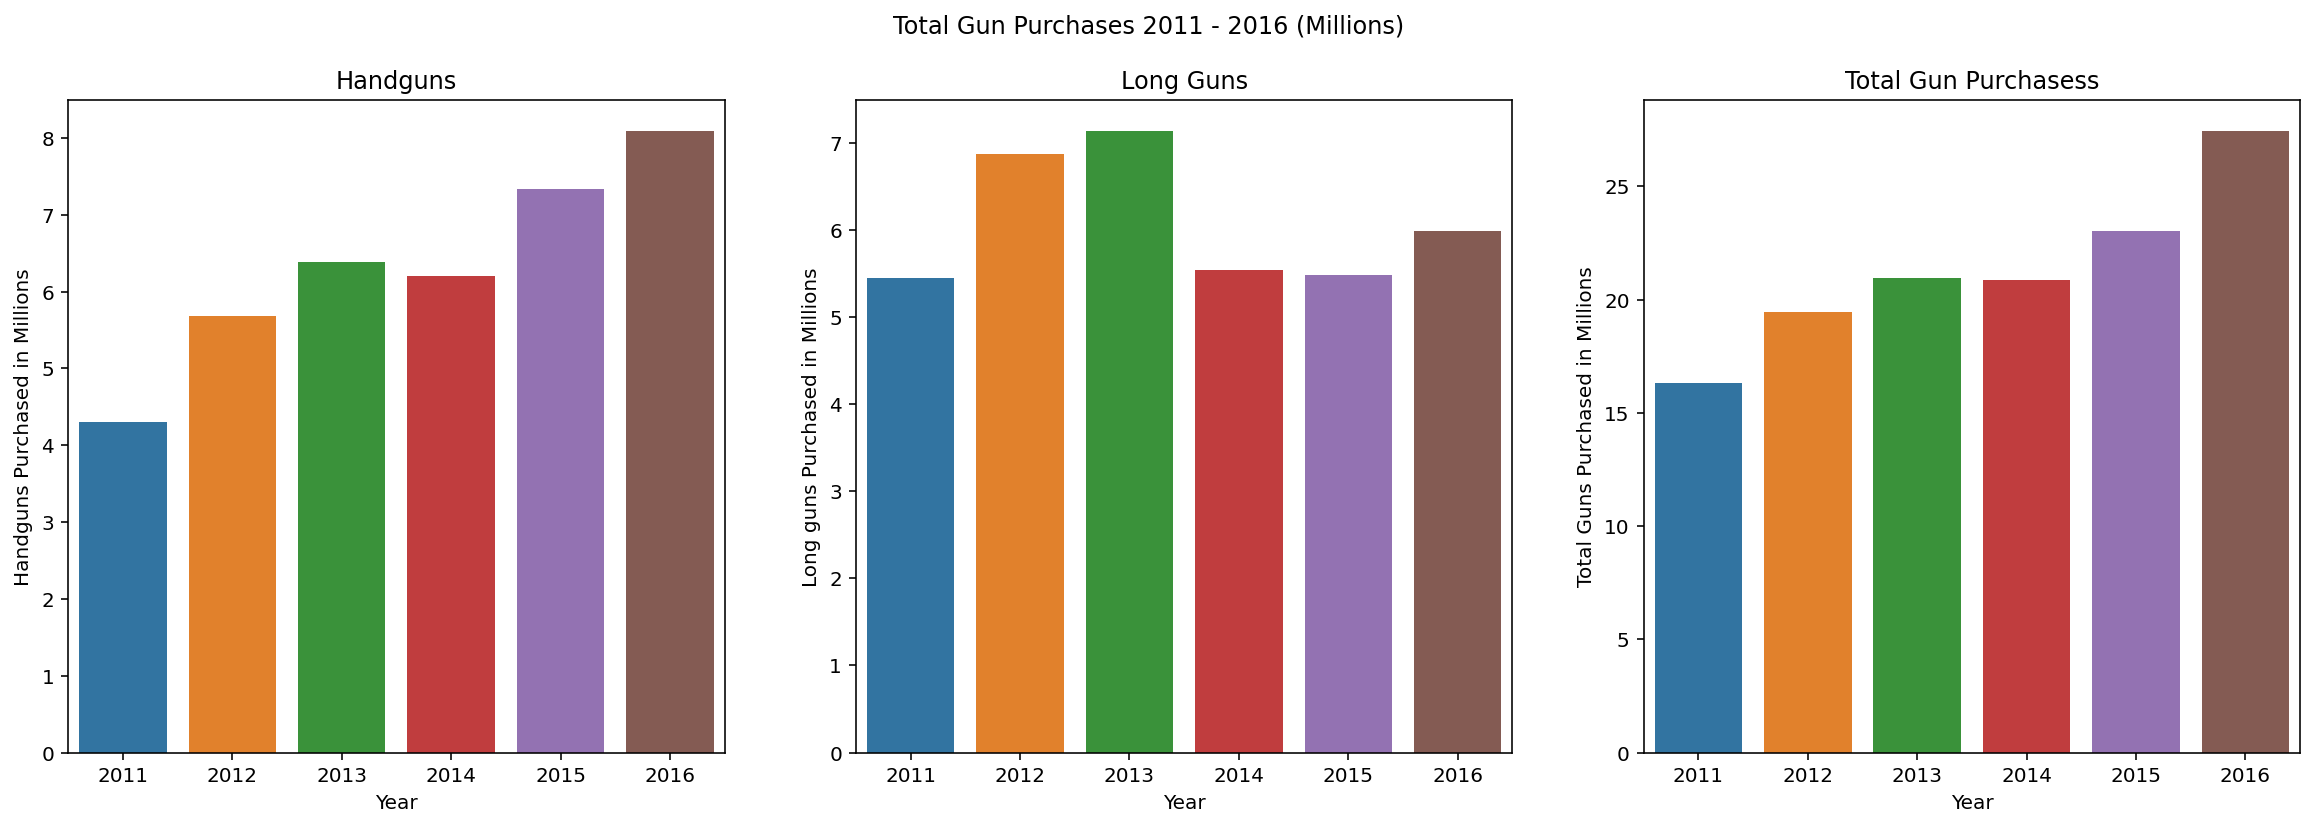

In [104]:
# Create the figure with 3 columns to hold barplots and assign title
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.suptitle('Total Gun Purchases 2011 - 2016 (Millions)')

# Create the barplot for handguns purchased by year
sns.barplot(x='year', y='handgun', data=df_annual_gun_purchases, ax=axes[0], estimator=np.sum)
axes[0].set_title('Handguns')
axes[0].set(ylabel='Handguns Purchased in Millions', xlabel='Year')

# Create the barplot for long guns purchased by year
sns.barplot(x='year', y='long_gun', data=df_annual_gun_purchases, ax=axes[1], estimator=np.sum)
axes[1].set_title('Long Guns')
axes[1].set(ylabel='Long guns Purchased in Millions', xlabel='Year')

# Create the barplot for total gun purchases by year
sns.barplot(x='year', y='totals', data=df_annual_gun_purchases, ax=axes[2], estimator=np.sum)
axes[2].set_title('Total Gun Purchasess')
axes[2].set(ylabel='Total Guns Purchased in Millions', xlabel='Year')

# Display the plot
plt.show()

# Information from the following websites was used to learn how to do the above steps
# https://www.kaggle.com/code/sujan97/data-visualization-quick-guide/notebook
# https://www.statology.org/seaborn-title/

>Observations:
>- An increase in annual handgun purchases is noted between 2011 and 2016. The number of handguns purchased in 2016 is almost double what was purchased in 2011.
>- An initial increase in long gun purchases from 2011 to 2013. A sharp drop back to 2011 levels occured for 2014-2015 with a slight increase again in 2016.
>- Total annual gun sales has seen a fairly steady rise from 2011 to 2016. There is an approximate 10 million more firearms being purchased annually in 2016 vs 2011.

>### Can any associations be made between median household income and firearm purchases for 2016?
>- Vizualize median household income for the States
>- Vizualize total firearm purchases distribution across median income bins
>- Vizualize per capita firearm purchases across State populations
>
>Determine what observations can be made from the data.

### Generate the vizualizations:

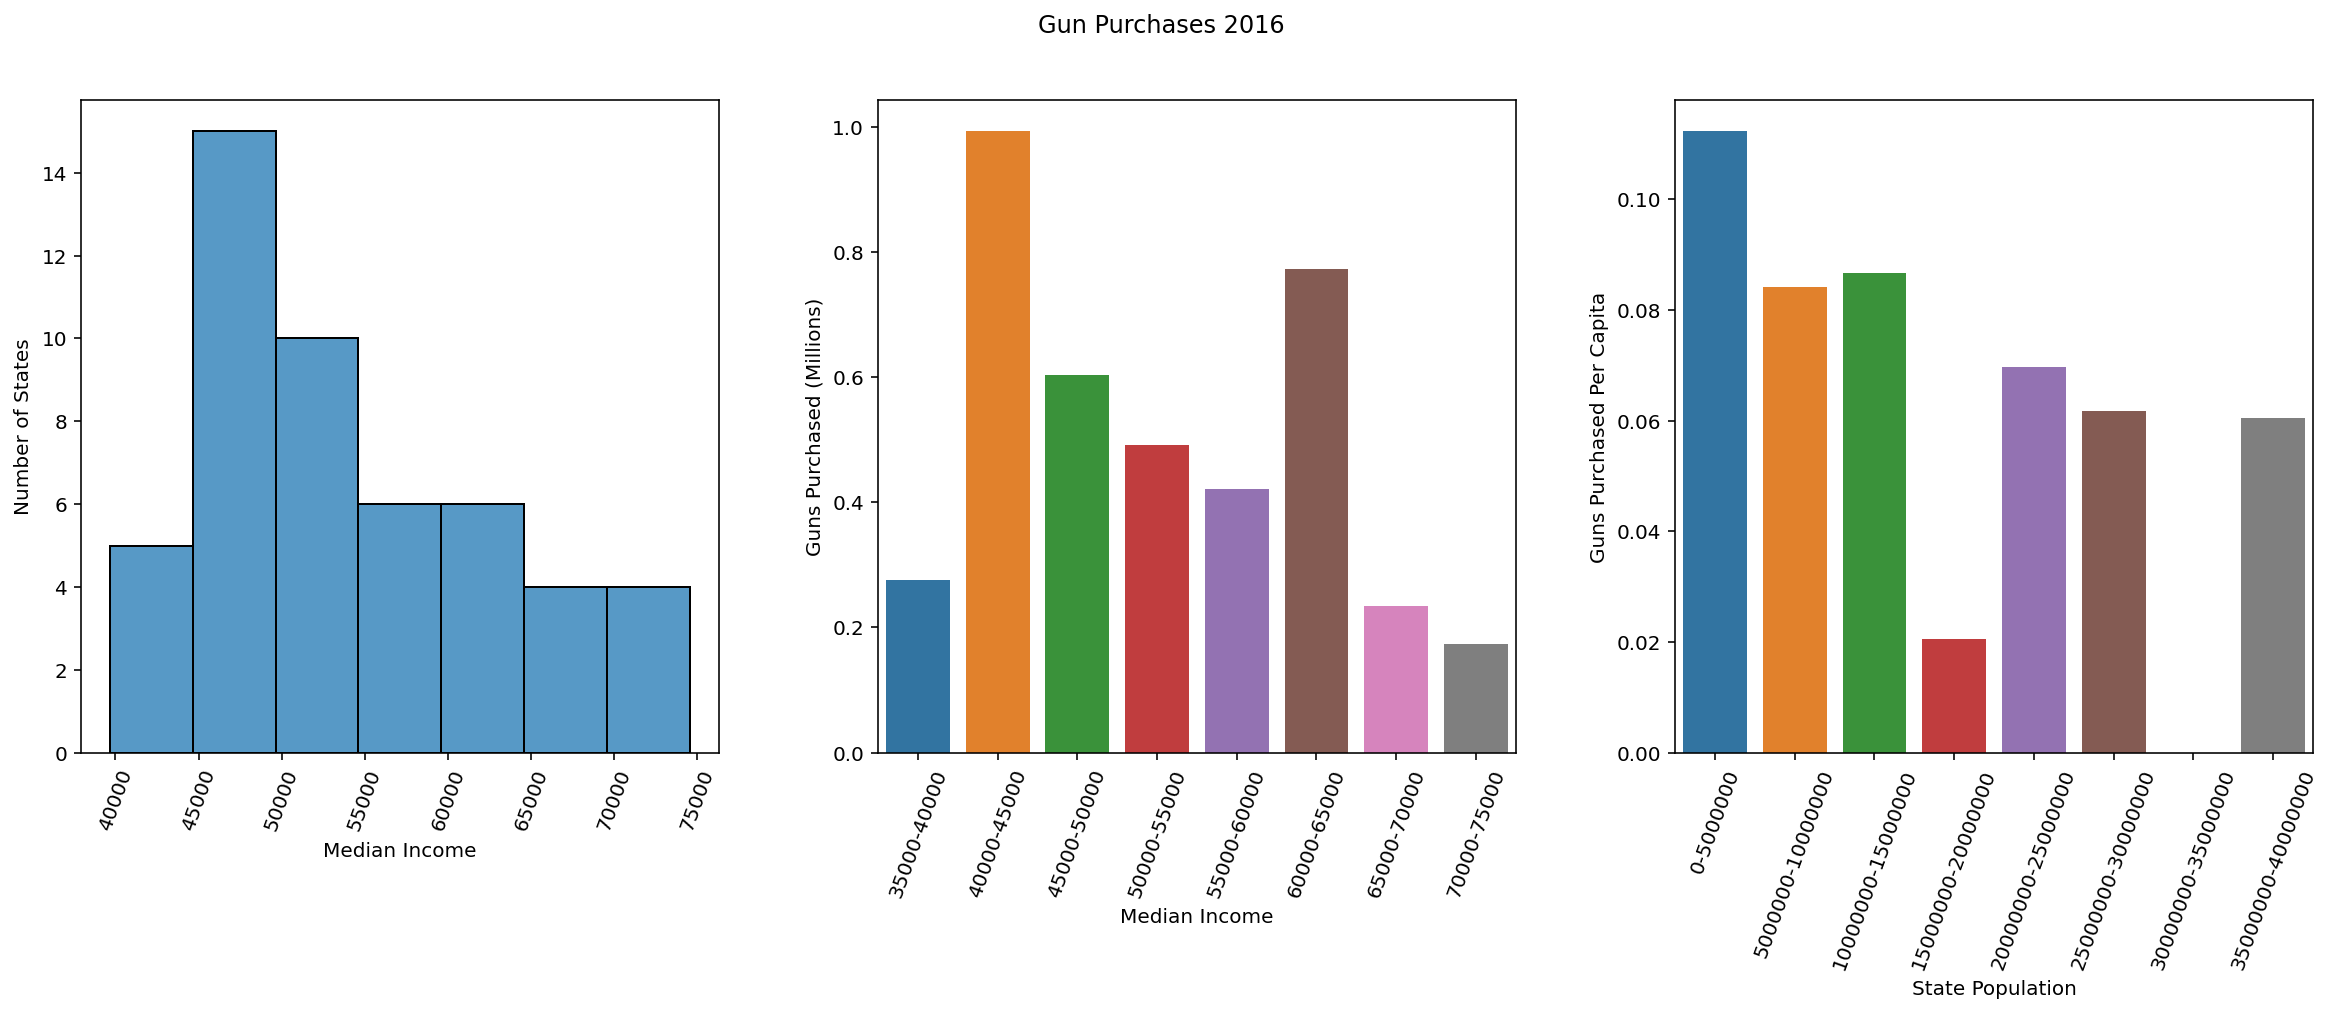

In [105]:
# Create bin columns for median_income and est_pop_2016
df_guns_med_income['bin_med'] = pd.cut(df_guns_med_income['median_income'], bins=range(35000,75001,5000), 
                                        labels=[f'{l}-{l+5000}' for l in range(35000,70001,5000)])
df_guns_med_income['bin_cap'] = pd.cut(df_guns_med_income['est_pop_2016'], bins=range(0,40000001,5000000), 
                                        labels=[f'{l}-{l+5000000}' for l in range(0,35000001,5000000)])

# Create the figure with 3 columns to hold barplots and assign title
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.subplots_adjust(wspace=.25)
fig.suptitle('Gun Purchases 2016')

# Create histplot for median_income for all states
sns.histplot(data=df_guns_med_income, x='median_income', ax=axes[0])
axes[0].tick_params('x', labelrotation=70)
axes[0].set(ylabel='Number of States', xlabel='Median Income')

# Create barplot for firearm purchases across median_income bins
sns.barplot(data=df_guns_med_income, x='bin_med', y=df_guns_med_income['totals'].div(1000000), ax=axes[1], ci=None)
axes[1].tick_params('x', labelrotation=70)
axes[1].set(ylabel='Guns Purchased (Millions)', xlabel='Median Income')

# Create barplot for guns per capita across state population bins
sns.barplot(data=df_guns_med_income, x='bin_cap', y='guns_per_capita', ax=axes[2], ci=None)
axes[2].tick_params('x', labelrotation=70)
axes[2].set(ylabel='Guns Purchased Per Capita', xlabel='State Population')

# Display the plot
plt.show()

# Information from the following websites was used to learn how to do the above steps
# https://www.tutorialspoint.com/how-to-adjust-the-space-between-matplotlib-seaborn-subplots-for-multi-plot-layouts
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/
# https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python

>Observations:
>
>Median Income:
>- The distribution of median income is skewed to the left.
>- Approximately 50% of the States have an annual income of $45,000 - $55,000
>
>Guns Purchased:
>- Almost 1 million firearms were purchased by households with an annual median income of $40,000 - $45,000
>- The majority of firearms were purchased by households making less than $60,000 per year.
>- Households with the highest median income of $70,000+ purchased the least amount of firearms.
>
>Per Captita:
>- States with less than 5,000,000 residents purchased the highest number of firearms.
>- The majority of firearm purchases were made by States with less than 15,000,000 residents.
>- The least amount of firearms were purchased by States with a population between 15,000,000 and 20,000,000 residents.

<a id='conclusions'></a>
>## Conclusions
>
>### Summary of the NICS and US Census analysis
>- There has been a significant increase in annual firearm purchases in the timeframe studied from 2011 - 2016.
>- States with lower median household incomes purchase more firearms than those States with higher median household incomes.
>- States with smaller populations purchase more firearms per capita than highly populated States.

## References
1. [Kaggle: Data Visualization: Quick Guide](https://www.kaggle.com/code/sujan97/data-visualization-quick-guide/notebook)
2. [Statology: How to Add a Title to Seaborn Plots (With Examples)](https://www.statology.org/seaborn-title/)
3. [TutorialsPoint: How to adjust the space between Matplotlib/Seaborn subplots for multi-plot layouts](https://www.tutorialspoint.com/how-to-adjust-the-space-between-matplotlib-seaborn-subplots-for-multi-plot-layouts)
4. [Datavizpyr: Data Viz with Python and R](https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/)
5. [StackOverflow: Make Bar Chart With Binned X Values Python](https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python)